# signal discussion

In this notebook, we want to discuss the expression of our signal. And by doing that we want to check whether the resolution of our spectrum is too small to track our signal peak.

## ringdown and frequency shift

Let's start with time domain data. For the cantilever, our signal is a ringdown (an exponentially decreasing cosine wave), and the frequency changes periodically. The frequency changes as our signal turns on and off. For example, we periodically turn the mudulate signal on and off, causing the frequency to change from f_oc to f_o periodically. Assuming our sampling rate is much higher than the frequency of our cantilever, we consider the detection of our cantilever frequency to be accurate. Additionally, we assume the frequency of the frequency change for the cantilever is relatively small comparing to the cantilever frequency, allowing us to track the frequency shift accurately.

If we observe the spectrum of frequency shift in frequency domain, it is to be expect that we see one signal peak, this peak refers to changing cantilever freq periodically. The main problem we have now is our measure time are limited to a relative short time, this makes the resolution of our freq spectrum to be low (about 3 Hz), thus we want to chech the bandwidth of our signal peak. As we only care about the bandwidth, we gonna approx the freq change by a series of square wave (we assume the freq change realtive fast), and the upper level last for t1, lower level last for t2.

![alt text](media/微信图片_20251006152440_57_164.jpg)

## t1==t2

when t1==t2, the expression degenrate to $cos(\frac{N-1}{2}(t1+t2)w)sin(\frac{N}{2}(t1+t2)w)$,  

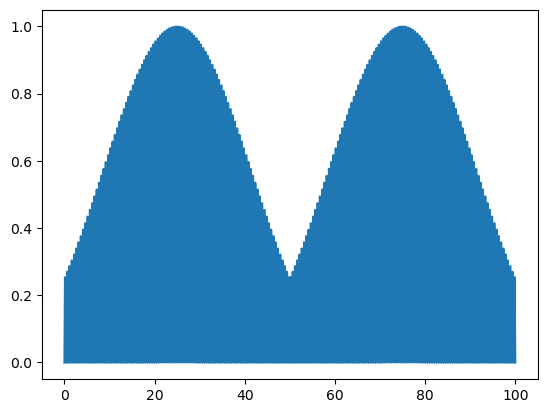

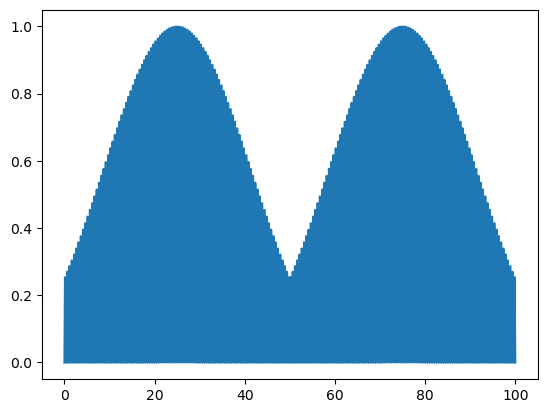

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100, 0.0001)

t1 = 0.01
t2 = 0.01
N=100

y1 = ((np.sin(2*np.pi*t1*x)+np.sin(2*np.pi*(2*N-1)*t1*x))/2)**2

y11 = (np.cos((N-1)*2*np.pi*(t1)*x)*np.sin(N*2*np.pi*(t1)*x))**2

y2 = (np.sin(2*np.pi*t1*x)*(np.cos((N-1)/2*2*np.pi*(t1+t2)*x))*np.sin(N/2*2*np.pi*(t2+t1)*x)/np.sin(1/2*2*np.pi*(t1+t2)))**2



plt.plot(x,y1)
plt.show()

plt.plot(x,y11)
plt.show()





### This tells us we are expect to see repeating peaks, f, 2f 3f... And also, from the expression, we know the strengh is mainly decided by the  $sin(t1*x)$, so the FWHM is actually decided by t1, it is $1/4t1$. So we don't need to worry about the bandwidth for our signal gonna be too small to detect, as long as our signal turning an and off quick enough, the bandwidth of our peak gonna be big enough. Band width problem is solved.

also, I also have a general obersvation/expection/assumption, for signal that has period of T, the ft of it is very likely to have a series of peak in 1/T,2/T,3/T,...

$\int_{0}^{nT}sig(t)exp(-iwt)dt = \sum_{k=0}^{n-1}\int_{kT}^{(k+1)T}sig(t)exp(-iwt)dt = (\int_{0}^{T}sig(t)exp(-iwt)dt)(\sum_{k=0}^{n-1}exp(-iwT)) = (\int_{0}^{T}sig(t)exp(-iwt)dt)(cos((N-1)/2*tw)\frac{sin(N/2*wt)}{sin(1/2*wt)})$

the summation of exp(iwT) gonna have a maximum with small band width (see phase problem notebook for more details), and the maximum gonna show up in 1/T,2/T,3/T... Below is the summation vs w, easy to check as the w increase, the summation quickly increase to 1 and then quickly decrease to 0. And it is periodical, the period is 1/T


![summation vs w](media/output1.png)

![summation vs w](media/output0.png)



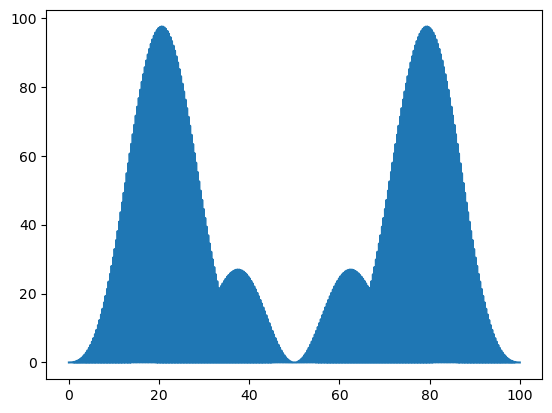

In [27]:
x = np.arange(0, 100, 0.0001)

t1 = 0.01
t2 = 0.02
N=100


y2 = (np.sin(2*np.pi*t1*x)*(np.cos((N-1)/2*2*np.pi*(t1+t2)*x))*np.sin(N/2*2*np.pi*(t2+t1)*x)/np.sin(1/2*2*np.pi*(t1+t2)))**2



plt.plot(x,y2)
plt.show()